In [3]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# from IPython.display import Image
# Image(filename='iris_photo.png')

In [5]:
iris = sns.load_dataset('iris')

In [20]:
print(iris.species)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


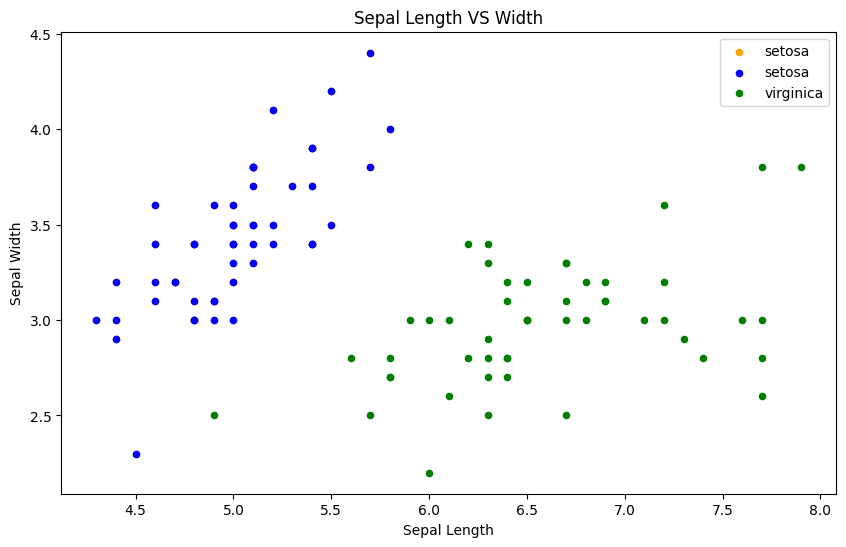

In [21]:
fig = iris[iris.species=='setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange', label='setosa')
iris[iris.species=='setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue', label='setosa',ax=fig)
iris[iris.species=='virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

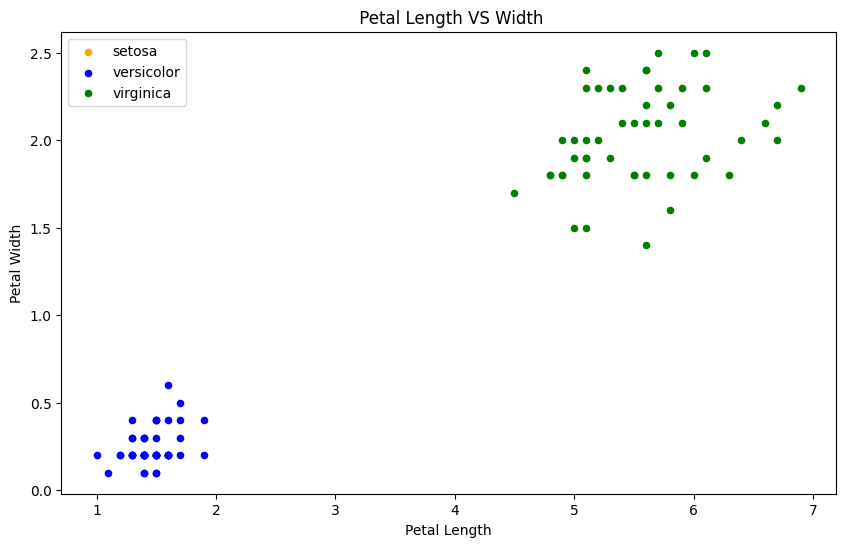

In [22]:
fig = iris[iris.species=='Iris-setosa'].plot.scatter(x='petal_length',y='petal_width',color='orange', label='setosa')
iris[iris.species=='setosa'].plot.scatter(x='petal_length',y='petal_width',color='blue', label='versicolor',ax=fig)
iris[iris.species=='virginica'].plot.scatter(x='petal_length',y='petal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

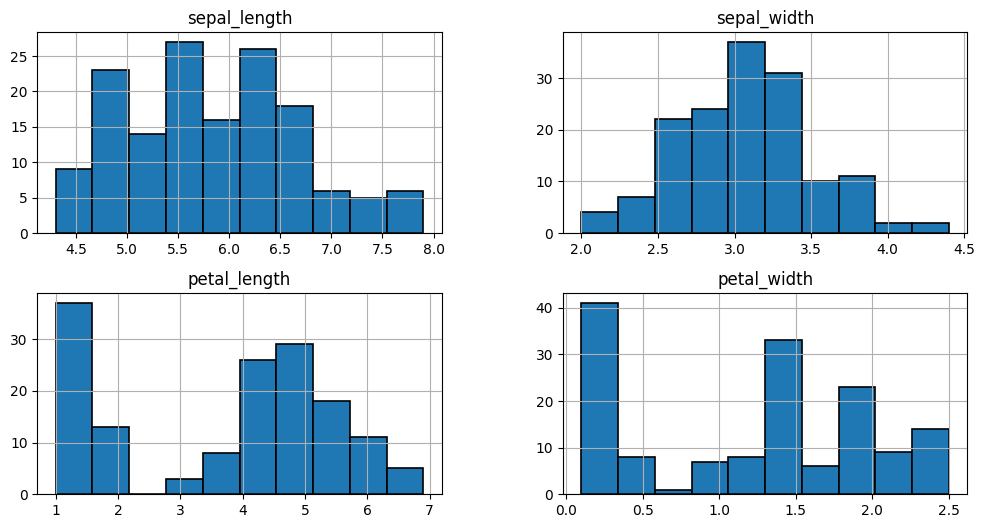

In [23]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [24]:
train, test = train_test_split(iris, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [25]:
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']]# taking the training data features
train_y=train.species# output of our training data
test_X= test[['sepal_length','sepal_width','petal_length','petal_width']] # taking test data features
test_y =test.species   #output value of test data

In [26]:
print(train_X.head(2))
print(test_X.head(2))

     sepal_length  sepal_width  petal_length  petal_width
36            5.5          3.5           1.3          0.2
122           7.7          2.8           6.7          2.0
    sepal_length  sepal_width  petal_length  petal_width
61           5.9          3.0           4.2          1.5
53           5.5          2.3           4.0          1.3


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [28]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9333333333333333


([<matplotlib.axis.XTick at 0x7e1b434ecd90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

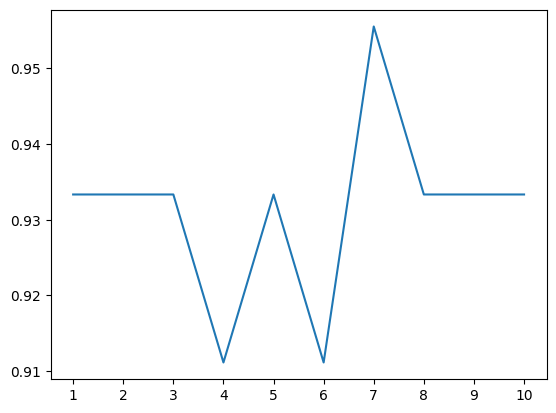

In [29]:
a_index=list(range(1,11))
a=[]
x= list(range(1,11))
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

In [30]:
petal=iris[['petal_length','petal_width','species']]
sepal=iris[['sepal_length','sepal_width','species']]

In [31]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['petal_width','petal_length']]
train_y_p=train_p.species
test_x_p=test_p[['petal_width','petal_length']]
test_y_p=test_p.species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['sepal_width','sepal_length']]
train_y_s=train_s.species
test_x_s=test_s[['sepal_width','sepal_length']]
test_y_s=test_s.species

In [32]:
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333
